In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
# Install pyarrow to read parket files
# !pip install pyarrow

In [5]:
# Dataset link http://127.0.0.1:8888/?token=68c179f7b043c3e276ca7fbe43cbcd7a63db9b5e25037873
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [37]:
df_fe = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [38]:
frames = [df, df_fe] 
df = pd.concat(frames)

In [6]:
df.shape

(3066766, 19)

In [5]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
df["duration"] =  df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [8]:
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [9]:
df.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [10]:
df["duration"].std()

42.594351241920904

In [11]:
%matplotlib inline

<AxesSubplot:xlabel='duration', ylabel='Count'>

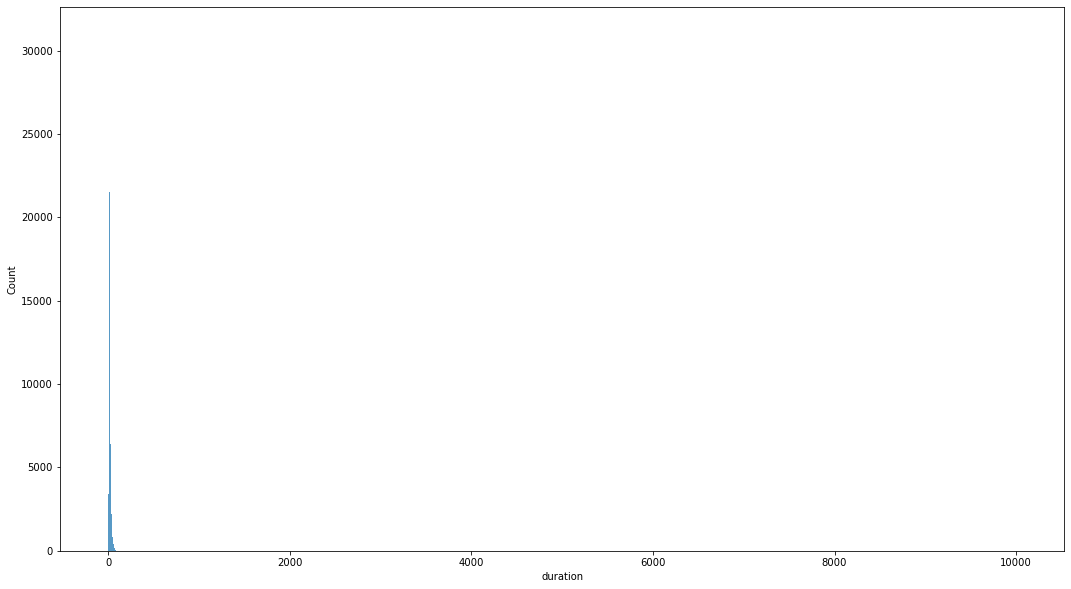

In [12]:
fig = plt.figure(figsize=(18,10))
sns.histplot(df.duration)

In [13]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [14]:
df = df[((df.duration >= 1) & (df.duration <= 60))]

<AxesSubplot:xlabel='duration', ylabel='Count'>

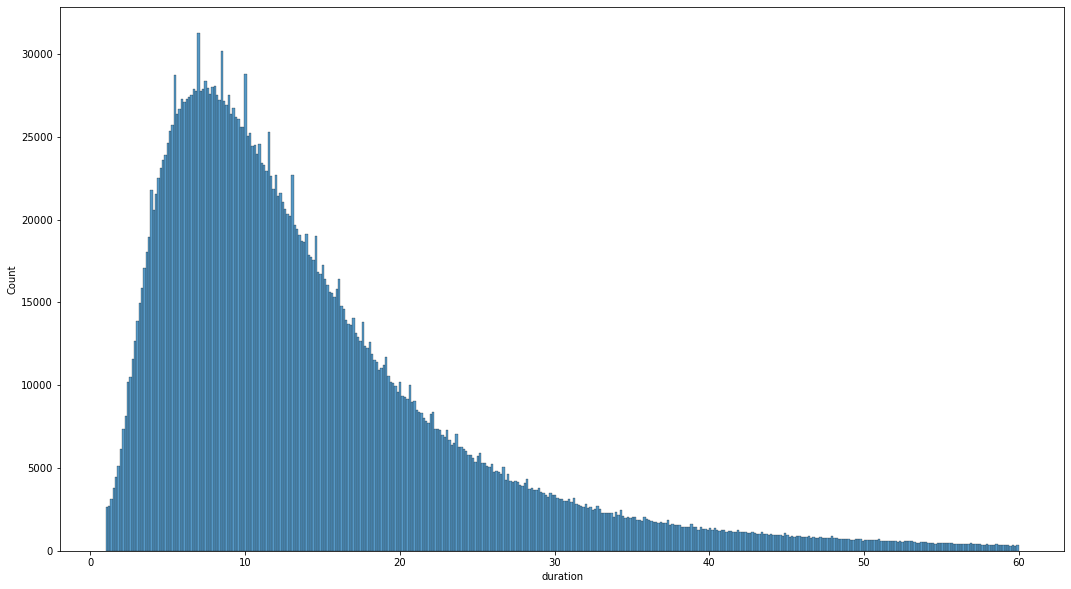

In [15]:
fig = plt.figure(figsize=(18,10))
sns.histplot(df.duration)

In [21]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    3.009173e+06
mean     1.420486e+01
std      9.939386e+00
min      1.000000e+00
50%      1.155000e+01
95%      3.476667e+01
98%      4.450000e+01
99%      5.026667e+01
max      6.000000e+01
Name: duration, dtype: float64

In [22]:
df.duration.min()

1.0

In [23]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [24]:
df[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [25]:
df[categorical] = df[categorical].astype(str)

In [26]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

: 

: 

: 

In [ ]:
dv = DictVectorizer()